In [53]:
import os,sys
import cv2
from tqdm import tqdm
import re
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from keras.utils.np_utils import to_categorical


In [66]:
def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        path = os.path.join(data_dir,img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        
        X.append(np.array(img))
        Z.append(str(label))

In [56]:
path = '/Users/faskerrr/code/Faskerrr/Doggos-101/raw_data/stanford_dogs_pics/cropped/train/'
breeds = os.listdir(path)
breeds

['n02097658-silky_terrier',
 'n02092002-Scottish_deerhound',
 'n02099849-Chesapeake_Bay_retriever',
 'n02091244-Ibizan_hound',
 'n02095314-wire-haired_fox_terrier',
 'n02091831-Saluki',
 'n02102318-cocker_spaniel',
 'n02104365-schipperke',
 'n02090622-borzoi',
 'n02113023-Pembroke',
 'n02105505-komondor',
 'n02093256-Staffordshire_bullterrier',
 'n02113799-standard_poodle',
 'n02109961-Eskimo_dog',
 'n02089973-English_foxhound',
 'n02099601-golden_retriever',
 'n02095889-Sealyham_terrier',
 'n02085782-Japanese_spaniel',
 '.DS_Store',
 'n02097047-miniature_schnauzer',
 'n02110063-malamute',
 'n02105162-malinois',
 'n02086079-Pekinese',
 'n02097130-giant_schnauzer',
 'n02113978-Mexican_hairless',
 'n02107142-Doberman',
 'n02097209-standard_schnauzer',
 'n02115913-dhole',
 'n02106662-German_shepherd',
 'n02106382-Bouvier_des_Flandres',
 'n02110185-Siberian_husky',
 'n02094258-Norwich_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02109525-Saint_Bernard',
 'n0209375

In [57]:
data_dirs = [path + i + '/' for i in breeds if i != '.DS_Store']
data_dirs

['/Users/faskerrr/code/Faskerrr/Doggos-101/raw_data/stanford_dogs_pics/cropped/train/n02097658-silky_terrier/',
 '/Users/faskerrr/code/Faskerrr/Doggos-101/raw_data/stanford_dogs_pics/cropped/train/n02092002-Scottish_deerhound/',
 '/Users/faskerrr/code/Faskerrr/Doggos-101/raw_data/stanford_dogs_pics/cropped/train/n02099849-Chesapeake_Bay_retriever/',
 '/Users/faskerrr/code/Faskerrr/Doggos-101/raw_data/stanford_dogs_pics/cropped/train/n02091244-Ibizan_hound/',
 '/Users/faskerrr/code/Faskerrr/Doggos-101/raw_data/stanford_dogs_pics/cropped/train/n02095314-wire-haired_fox_terrier/',
 '/Users/faskerrr/code/Faskerrr/Doggos-101/raw_data/stanford_dogs_pics/cropped/train/n02091831-Saluki/',
 '/Users/faskerrr/code/Faskerrr/Doggos-101/raw_data/stanford_dogs_pics/cropped/train/n02102318-cocker_spaniel/',
 '/Users/faskerrr/code/Faskerrr/Doggos-101/raw_data/stanford_dogs_pics/cropped/train/n02104365-schipperke/',
 '/Users/faskerrr/code/Faskerrr/Doggos-101/raw_data/stanford_dogs_pics/cropped/train/n02

In [58]:
breed_names = [re.findall('n\d{8}-(.*)', i)[0][:-1].capitalize() for i in data_dirs]
breed_names

['Silky_terrier',
 'Scottish_deerhound',
 'Chesapeake_bay_retriever',
 'Ibizan_hound',
 'Wire-haired_fox_terrier',
 'Saluki',
 'Cocker_spaniel',
 'Schipperke',
 'Borzoi',
 'Pembroke',
 'Komondor',
 'Staffordshire_bullterrier',
 'Standard_poodle',
 'Eskimo_dog',
 'English_foxhound',
 'Golden_retriever',
 'Sealyham_terrier',
 'Japanese_spaniel',
 'Miniature_schnauzer',
 'Malamute',
 'Malinois',
 'Pekinese',
 'Giant_schnauzer',
 'Mexican_hairless',
 'Doberman',
 'Standard_schnauzer',
 'Dhole',
 'German_shepherd',
 'Bouvier_des_flandres',
 'Siberian_husky',
 'Norwich_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Saint_bernard',
 'Border_terrier',
 'Briard',
 'Tibetan_mastiff',
 'Bull_mastiff',
 'Maltese_dog',
 'Kerry_blue_terrier',
 'Kuvasz',
 'Greater_swiss_mountain_dog',
 'Lakeland_terrier',
 'Blenheim_spaniel',
 'Basset',
 'West_highland_white_terrier',
 'Chihuahua',
 'Border_collie',
 'Redbone',
 'Irish_wolfhound',
 'Bluetick',
 'Miniature_poodle',
 'Cardigan',
 'Entlebucher',
 'No

In [67]:
X = []
Z = []

for i in range(120):
    training_data(breed_names[i], data_dirs[i])
    

100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 489.92it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 417.00it/s]


In [68]:
X

[array([[[154, 159, 158],
         [154, 159, 158],
         [154, 159, 158],
         ...,
         [181, 195, 137],
         [173, 192, 141],
         [172, 194, 145]],
 
        [[153, 158, 157],
         [153, 158, 157],
         [153, 158, 157],
         ...,
         [176, 191, 134],
         [165, 184, 133],
         [158, 183, 133]],
 
        [[153, 158, 157],
         [153, 158, 157],
         [153, 158, 157],
         ...,
         [175, 191, 137],
         [163, 185, 133],
         [152, 178, 130]],
 
        ...,
 
        [[176, 169, 166],
         [177, 170, 167],
         [178, 171, 168],
         ...,
         [203, 194, 191],
         [201, 192, 189],
         [199, 190, 187]],
 
        [[178, 171, 168],
         [179, 172, 169],
         [180, 173, 170],
         ...,
         [203, 194, 191],
         [203, 194, 191],
         [203, 194, 191]],
 
        [[179, 172, 169],
         [180, 173, 170],
         [181, 174, 171],
         ...,
         [203, 194, 191],
  

In [70]:
X = np.array(X)
X

array([[[[154, 159, 158],
         [154, 159, 158],
         [154, 159, 158],
         ...,
         [181, 195, 137],
         [173, 192, 141],
         [172, 194, 145]],

        [[153, 158, 157],
         [153, 158, 157],
         [153, 158, 157],
         ...,
         [176, 191, 134],
         [165, 184, 133],
         [158, 183, 133]],

        [[153, 158, 157],
         [153, 158, 157],
         [153, 158, 157],
         ...,
         [175, 191, 137],
         [163, 185, 133],
         [152, 178, 130]],

        ...,

        [[176, 169, 166],
         [177, 170, 167],
         [178, 171, 168],
         ...,
         [203, 194, 191],
         [201, 192, 189],
         [199, 190, 187]],

        [[178, 171, 168],
         [179, 172, 169],
         [180, 173, 170],
         ...,
         [203, 194, 191],
         [203, 194, 191],
         [203, 194, 191]],

        [[179, 172, 169],
         [180, 173, 170],
         [181, 174, 171],
         ...,
         [203, 194, 191],
        

In [71]:
X.shape

(12000, 224, 224, 3)

In [ ]:
X=X/255
X.shape

In [60]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,120)

In [61]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

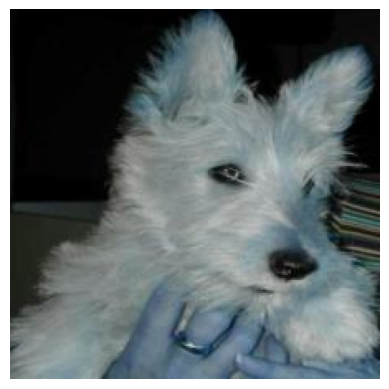

In [17]:
plt.axis('off')
# for i in range(0, 100, 10):
#     pic = cv2.imread(path + paths[i])
#     plt.imshow(pic)
pic = cv2.imread(path + 'n02097298-Scotch_terrier/' + 'n02097298_9217.jpg')
# print(pic.shape)
plt.imshow(pic);


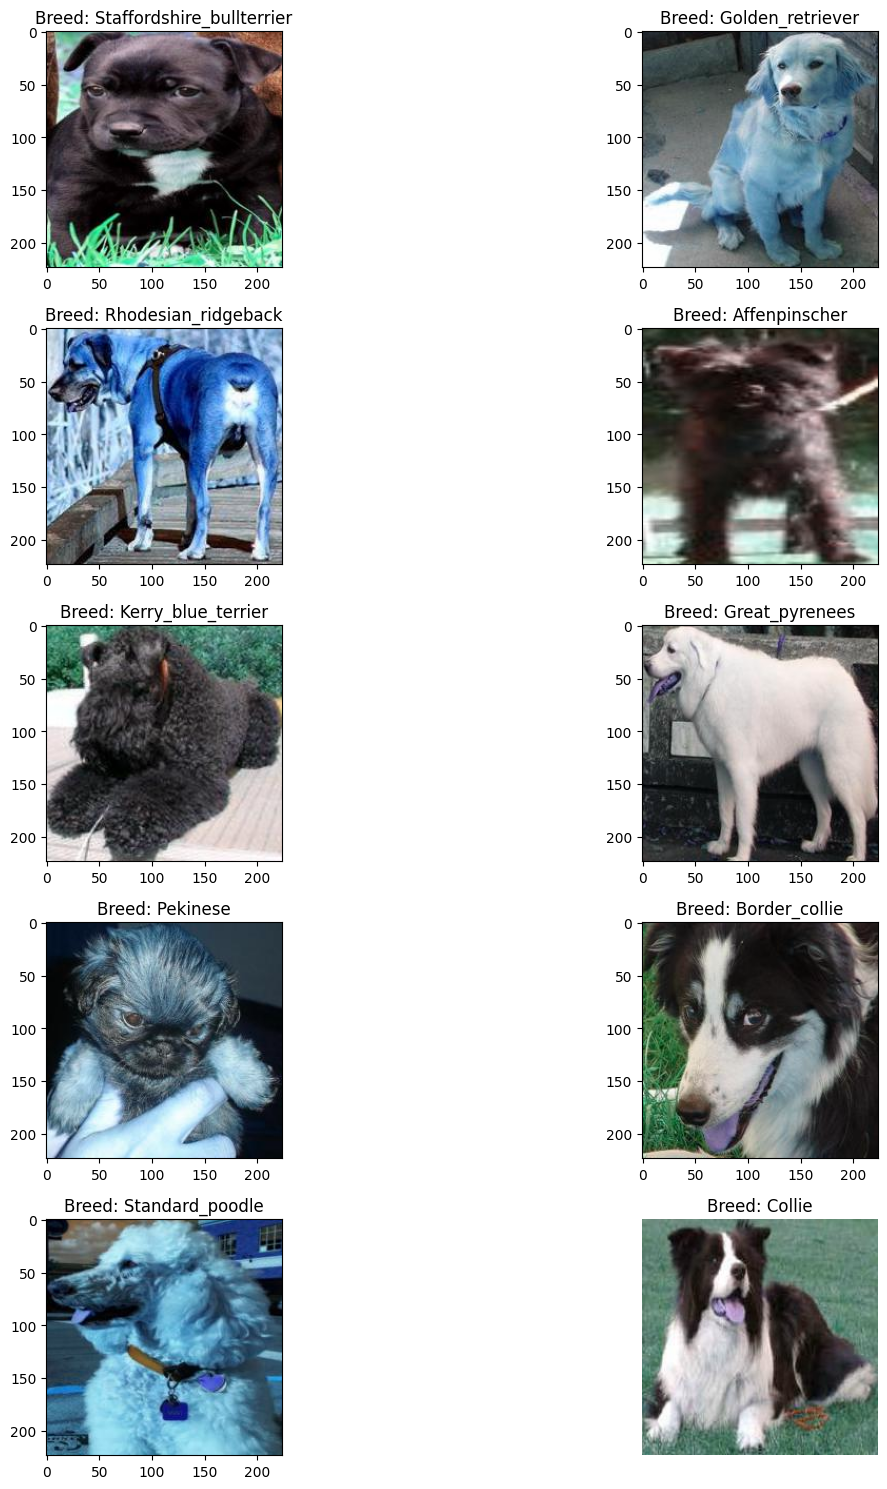

In [65]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Breed: '+Z[l])

plt.axis('off')
plt.tight_layout()
fig.show;